In [ ]:
!gdown -qq https://drive.google.com/file/d/1iEVuj3tZNIgItDb2pE_-_37_NbZV3Vm9/view?usp=sharing --fuzzy

In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.6 MB/s eta 0:00:00


In [ ]:
import contractions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [ ]:
idx = df[(df['sentiment'] == 'empty') |
                      (df['sentiment'] == 'enthusiasm')|
               (df['sentiment'] == 'anger') |
               (df['sentiment'] == 'boredom')
              ].index
df.drop(idx, inplace = True)

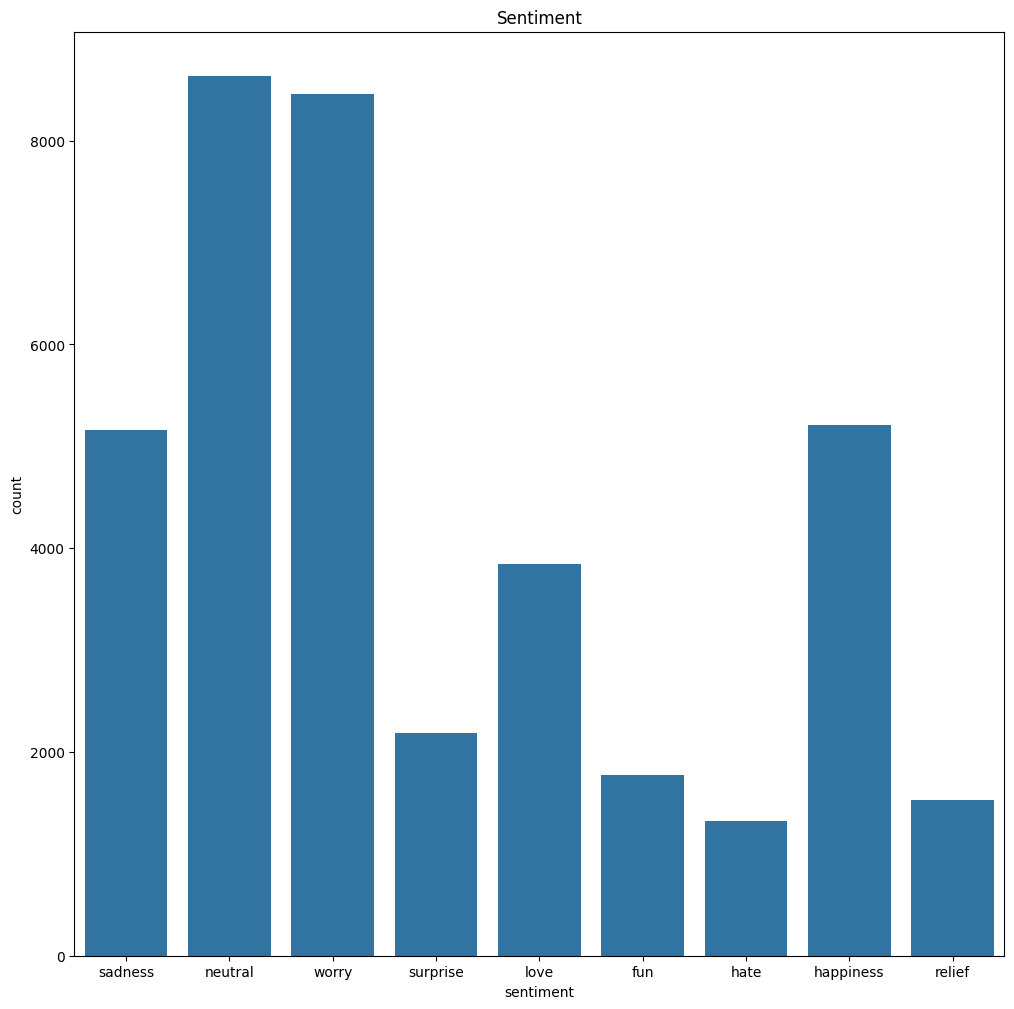

In [ ]:
plt.figure(figsize=(12, 12))
sns.countplot(x=df['sentiment'])
plt.title('Sentiment')
plt.show()

# Data Cleaning

In [ ]:
df['sentiment'].isna().sum()

0

In [ ]:
df['content'].isna().sum()

0

In [ ]:
df.duplicated().any()

False

In [ ]:
df.drop('tweet_id', axis=1, inplace=True)

In [ ]:
idx = df[(df['sentiment'] == 'empty') |
              (df['sentiment'] == 'enthusiasm')|
               (df['sentiment'] == 'anger') |

               (df['sentiment'] == 'boredom')
              ].index

df.drop(idx, inplace = True)

In [ ]:
df_clean = df.copy()

In [ ]:
def expand_contractions(text):
    '''
    Function replaces abbreviations with full word versions
    '''
    return contractions.fix(text)

def clean_content(text):

    text = expand_contractions(text)

    # remove twitter handles
    clean_text = re.sub(r'@\w+\s?', '', text)

    # convert to lowercase
    clean_text = clean_text.lower()

    # remove links http:// or https://
    clean_text = re.sub(r'https?:\/\/\S+', '', clean_text)

    # remove links beginning with www. and ending with .com
    clean_text = re.sub(r'www\.[a-z]?\.?(com)+|[a-z]+\.(com)', '', clean_text)

    # remove html reference characters
    clean_text = re.sub(r'&[a-z]+;', '', clean_text)

    # remove non-letter characters besides spaces "/", ";" "[", "]" "=", "#"
    clean_text = re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', clean_text)
    clean_text = clean_text.split()

    return clean_text

In [ ]:
df_clean['content'] = df_clean['content'].apply(lambda x :  clean_content(x))


In [ ]:
df_clean.head()

,sentiment,content
1,sadness,"[layin, n, bed, with, a, headache, ughhhhwaiti..."
2,sadness,"[funeral, ceremonygloomy, friday]"
4,neutral,"[we, want, to, trade, with, someone, who, has,..."
5,worry,"[re-pinging, :, why, did, not, you, go, to, pr..."
6,sadness,"[i, should, be, sleep, but, i, am, not, thinki..."


# EDA

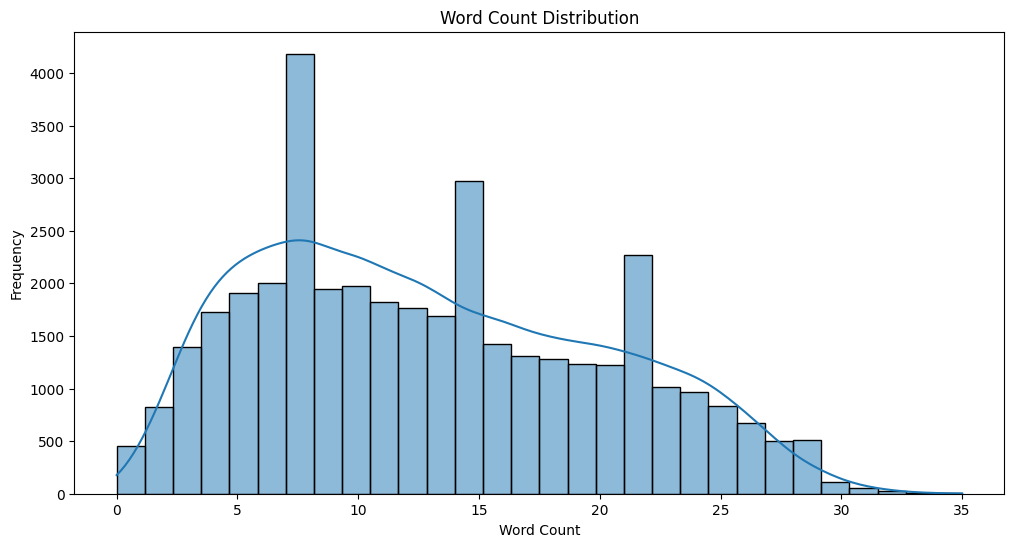

In [ ]:
# Text Statistics for lists
df_clean['word_count'] = df_clean['content'].apply(len)  # List length gives the word count directly
df_clean['unique_word_count'] = df_clean['content'].apply(lambda x: len(set(x)))  # Set of list gives unique words

plt.figure(figsize=(12, 6))
sns.histplot(df_clean['word_count'], bins=30, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

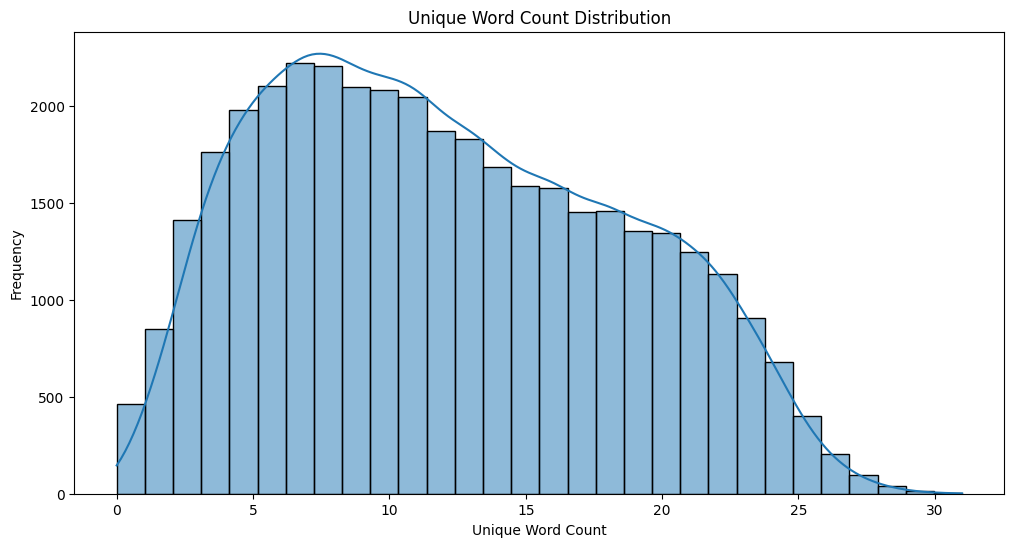

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['unique_word_count'], bins=30, kde=True)
plt.title('Unique Word Count Distribution')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency')
plt.show()

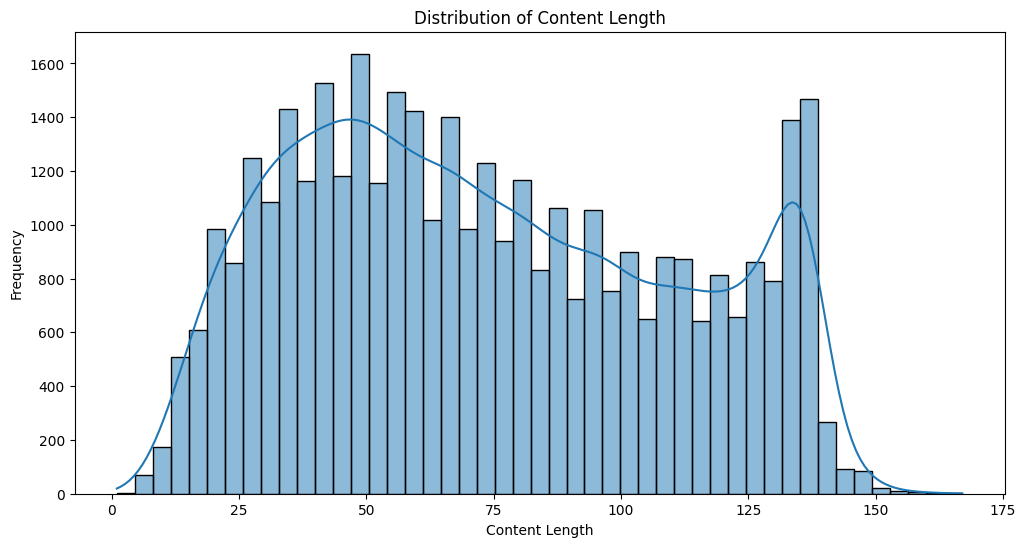

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['content'].str.len(), kde=True)
plt.title('Distribution of Content Length')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Count the number of stopwords in the data
temp =df.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['content'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

stop_words
2     5214
3     5169
4     4689
1     4416
5     4081
6     3507
0     3443
7     2659
8     1972
9     1330
10     873
11     398
12     222
13     113
14      29
15       6
17       2
16       2
Name: count, dtype: int64

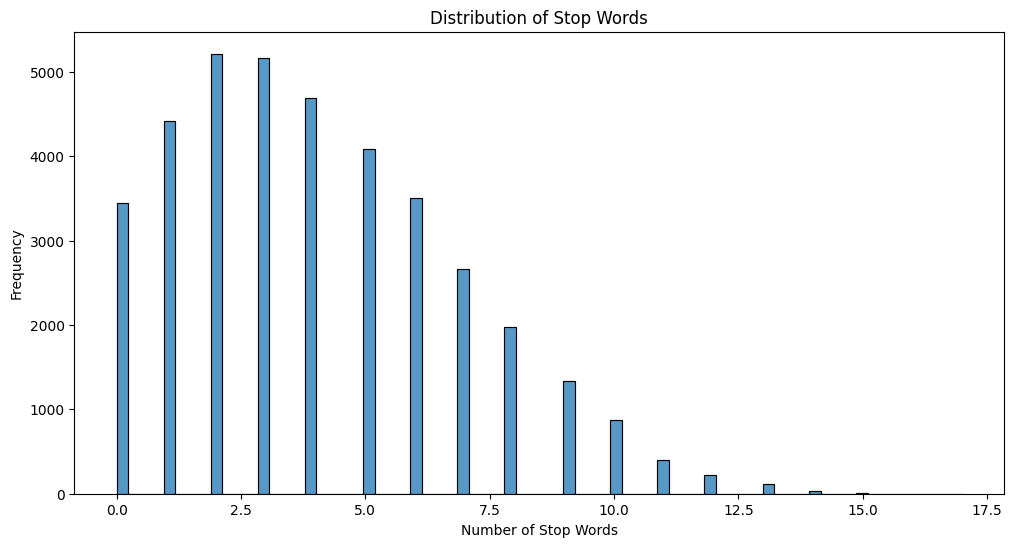

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(temp['stop_words'], kde=False)
plt.title('Distribution of Stop Words')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

## Visualization - WordCloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

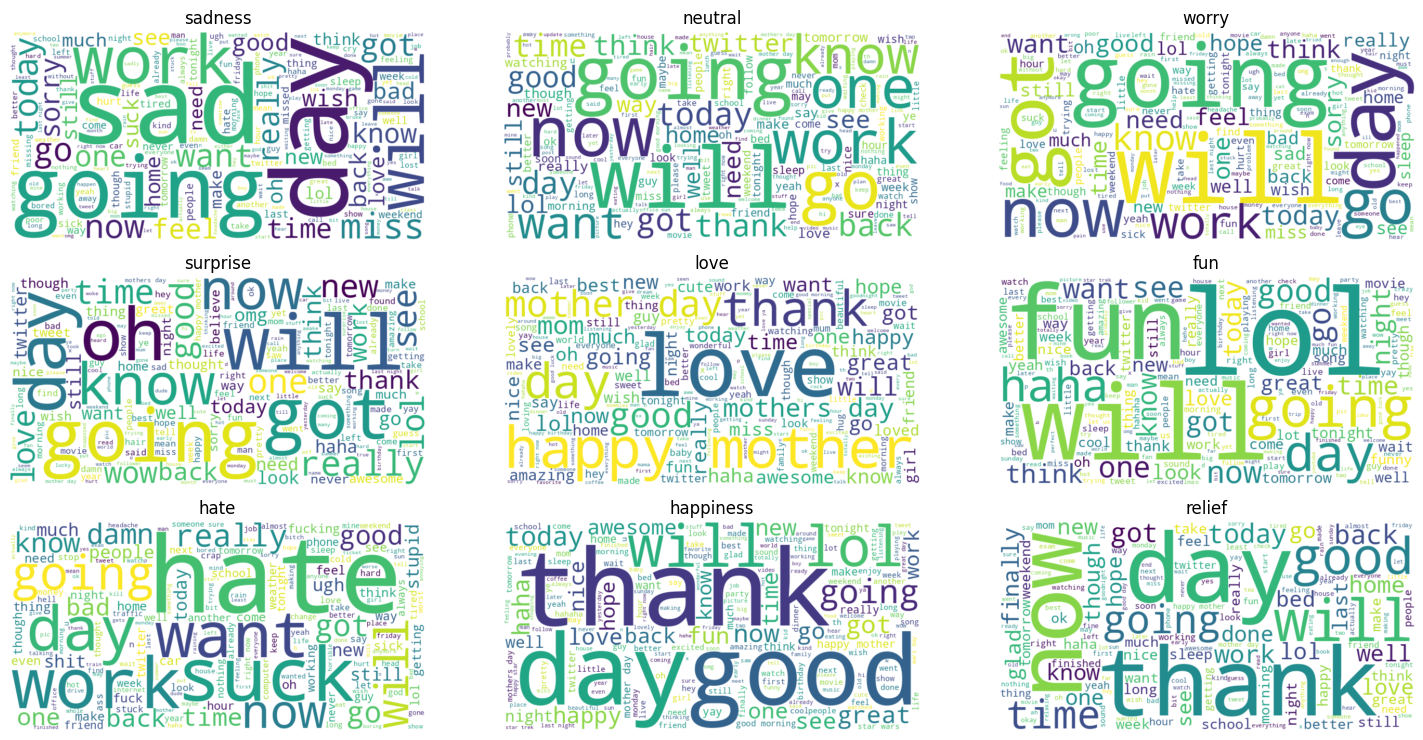

In [ ]:
df_clean['content'] = df_clean['content'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

sentiments = df_clean['sentiment'].unique()
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 7.5))

for ax, sentiment in zip(axes.flatten(), sentiments):
    # Filter the dataframe for the current sentiment and join the text content
    text = " ".join(df_clean[df_clean['sentiment'] == sentiment]['content'])
    cloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10).generate(text)
    ax.imshow(cloud, interpolation='bilinear')
    ax.set_title(sentiment)
    ax.axis("off")

plt.tight_layout()
plt.show()


## Tokenization

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def process(text):
    #text = ' '.join(text)
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return stemmed_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X = df_clean['content']
y = df_clean['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=777)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.8,test_size=0.2, random_state=777)

In [ ]:
X_train_processed = [process(text) for text in X_train]
X_test_processed = [process(text) for text in X_test]
#X_val_processed = [process(text) for text in X_val]

In [ ]:
X_train_processed[0:10]

[['fight', 'cold'],
 ['studi', 'american', 'revolutiongeorg', 'washington'],
 ['haha', 'yeahh', 'still', 'follow', 'though'],
 ['excel', 'pic', 'wish', 'long', 'drive', 'tn'],
 ['vampir',
  'tarot',
  'etern',
  'night',
  'lo',
  'scarabeo',
  'go',
  'releas',
  'sometim',
  'autumn',
  'cool',
  'huh'],
 ['wish',
  'feel',
  'betteri',
  'hold',
  'potenti',
  'cold',
  'bay',
  'day',
  'think',
  'winningach',
  'cough'],
 ['want', 'go', 'extra', 'show', 'realli', 'bad'],
 ['britt',
  '-',
  'came',
  'way',
  'say',
  "'may",
  'fourth',
  "'",
  '-',
  'work',
  'done'],
 ['nope', 'although', 'sure', 'want', 'go'],
 ['found',
  'one',
  'great',
  'thing',
  'live',
  'switzerland',
  'delici',
  'bread',
  '-',
  'sometim',
  'littl',
  'thing',
  'make',
  'differ']]

In [ ]:
# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)  # Preserve already preprocessed tokens
X_train_tfidf = tfidf.fit_transform(X_train_processed)
X_test_tfidf = tfidf.transform(X_test_processed)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# Baseline Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import torch



# Create Decision Tree classifer object
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train Decision Tree Classifer
model_dt  = model_dt.fit(X_train_tfidf,y_train)

#Predict the response for test dataset
y_pred = model_dt.predict(X_test_tfidf)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.27304918032786885
              precision    recall  f1-score   support

         fun       0.00      0.00      0.00       344
   happiness       0.35      0.04      0.08      1028
        hate       0.52      0.19      0.28       263
        love       0.51      0.33      0.40       772
     neutral       0.25      0.97      0.40      1779
      relief       0.00      0.00      0.00       305
     sadness       0.57      0.00      0.01      1004
    surprise       0.00      0.00      0.00       417
       worry       0.00      0.00      0.00      1713

    accuracy                           0.27      7625
   macro avg       0.24      0.17      0.13      7625
weighted avg       0.25      0.27      0.16      7625



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.3580327868852459
              precision    recall  f1-score   support

         fun       0.28      0.03      0.05       344
   happiness       0.33      0.36      0.34      1028
        hate       0.53      0.16      0.24       263
        love       0.47      0.35      0.40       772
     neutral       0.36      0.56      0.44      1779
      relief       0.33      0.05      0.09       305
     sadness       0.33      0.21      0.26      1004
    surprise       0.33      0.04      0.07       417
       worry       0.35      0.47      0.40      1713

    accuracy                           0.36      7625
   macro avg       0.37      0.25      0.25      7625
weighted avg       0.36      0.36      0.33      7625



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# randome forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train_tfidf, y_train)

y_pred = random_forest.predict(X_test_tfidf)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.3523934426229508
              precision    recall  f1-score   support

         fun       0.06      0.01      0.02       344
   happiness       0.33      0.34      0.34      1028
        hate       0.43      0.19      0.27       263
        love       0.43      0.37      0.40       772
     neutral       0.36      0.56      0.44      1779
      relief       0.18      0.02      0.04       305
     sadness       0.34      0.23      0.27      1004
    surprise       0.23      0.05      0.08       417
       worry       0.34      0.44      0.38      1713

    accuracy                           0.35      7625
   macro avg       0.30      0.24      0.25      7625
weighted avg       0.33      0.35      0.33      7625



# BERT

In [ ]:
import tensorflow as tf
#import tensorflow_hub as hub
#import tensorflow_text as text

In [ ]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
import torch


train_texts, test_texts, train_labels, test_labels = train_test_split(df['content'], df['sentiment'], test_size=0.2)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=128, return_tensors="pt")
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=128, return_tensors="pt")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
train_labels_tensor = torch.tensor(train_labels_encoded)
test_labels_encoded = label_encoder.fit_transform(test_labels)
test_labels_tensor = torch.tensor(test_labels_encoded)

In [ ]:
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels_tensor)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels_tensor)

train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=128)
test_loader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=128)
num_classes = len(label_encoder.classes_)
print('Number of classes:', num_classes)

# Make sure that the encoded labels are within the range of [0, num_classes-1]
print('Encoded labels range:', label_encoder.transform(label_encoder.classes_))
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

Number of classes: 9
Encoded labels range: [0 1 2 3 4 5 6 7 8]


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(), lr=2e-5)
epochs = 8
total_steps = len(train_loader) * epochs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# スケジューラの設定
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)


for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_attention_mask, b_labels = batch  # attention_maskをバッチから取得
        optimizer.zero_grad()

        # モデルにinput_idsとattention_maskを渡す
        outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels)

        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()
    print(f"Epoch {epoch+1}/{epochs} Loss: {total_loss/len(train_loader)}")
model.eval()
predictions, true_labels = [], []

for batch in test_loader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_attention_mask, b_labels = batch  # attention_maskをバッチから取得

    with torch.no_grad():
        # モデルにinput_idsとattention_maskを渡す
        outputs = model(b_input_ids, attention_mask=b_attention_mask)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    predictions.append(logits)
    true_labels.append(label_ids)

# ロジットから予測を計算
predictions = np.concatenate(predictions, axis=0)
true_labels = np.concatenate(true_labels, axis=0)
pred_flat = np.argmax(predictions, axis=1).flatten()
labels_flat = true_labels.flatten()

# 精度を計算
accuracy = accuracy_score(labels_flat, pred_flat)
print(f"Test Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/8 Loss: 1.8013616540940736
Epoch 2/8 Loss: 1.5751575475956108
Epoch 3/8 Loss: 1.4737801422135102
Epoch 4/8 Loss: 1.3728637959667829
Epoch 5/8 Loss: 1.2636355445973544
Epoch 6/8 Loss: 1.1630623417918153
Epoch 7/8 Loss: 1.085212510749386
Epoch 8/8 Loss: 1.036167290669605
Test Accuracy: 0.3910819672131148


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels_flat, pred_flat))

              precision    recall  f1-score   support

           0       0.17      0.12      0.14       328
           1       0.38      0.46      0.42      1034
           2       0.31      0.29      0.30       255
           3       0.47      0.43      0.45       773
           4       0.45      0.47      0.46      1758
           5       0.19      0.13      0.15       302
           6       0.33      0.33      0.33      1018
           7       0.25      0.14      0.18       440
           8       0.42      0.46      0.44      1717

    accuracy                           0.39      7625
   macro avg       0.33      0.32      0.32      7625
weighted avg       0.38      0.39      0.38      7625



# Bert Revised

In [ ]:
import tensorflow as tf
import torch.nn as nn
#import tensorflow_hub as hub
#import tensorflow_text as text

In [ ]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
import torch

train_texts, X_temp, train_labels, y_temp = train_test_split(df['content'], df['sentiment'], test_size=0.4, random_state=42)

# Now split the temporary set into validation and test sets
val_texts, test_texts, val_labels, test_labels = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=128, return_tensors="pt")
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=128, return_tensors="pt")
val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=128, return_tensors="pt")


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
train_labels_tensor = torch.tensor(train_labels_encoded)
test_labels_encoded = label_encoder.fit_transform(test_labels)
test_labels_tensor = torch.tensor(test_labels_encoded)
val_labels_encoded = label_encoder.fit_transform(val_labels)
val_labels_tensor = torch.tensor(val_labels_encoded)

In [ ]:
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels_tensor)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels_tensor)
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], val_labels_tensor)

train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=128)
test_loader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=128)
val_loader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=128)
num_classes = len(label_encoder.classes_)
print('Number of classes:', num_classes)

# Make sure that the encoded labels are within the range of [0, num_classes-1]
print('Encoded labels range:', label_encoder.transform(label_encoder.classes_))
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)
model.classifier.dropout = nn.Dropout(0.1)

Number of classes: 9
Encoded labels range: [0 1 2 3 4 5 6 7 8]


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(), lr=1e-5)
epochs = 6
total_steps = len(train_loader) * epochs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
best_valid_loss = float('inf')

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_attention_mask, b_labels = batch
        optimizer.zero_grad()


        outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels)

        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()
    model.eval()
    valid_loss = 0
    with torch.no_grad():
      for batch in train_loader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_attention_mask, b_labels = batch
        optimizer.zero_grad()
        outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels)
        loss = outputs.loss
        valid_loss += loss.item()

    # Early stopping
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best_model_state.bin')
    else:
        print("Validation loss did not improve, stopping...")
        break


    print(f"Epoch {epoch+1}, Train Loss: {total_loss / len(train_loader)}, Validation Loss: {valid_loss / len(val_loader)}")

predictions, true_labels = [], []

for batch in test_loader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_attention_mask, b_labels = batch

    with torch.no_grad():

        outputs = model(b_input_ids, attention_mask=b_attention_mask)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    predictions.append(logits)
    true_labels.append(label_ids)


predictions = np.concatenate(predictions, axis=0)
true_labels = np.concatenate(true_labels, axis=0)
pred_flat = np.argmax(predictions, axis=1).flatten()
labels_flat = true_labels.flatten()


accuracy = accuracy_score(labels_flat, pred_flat)
print(f"Test Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Train Loss: 1.891942066853273, Validation Loss: 4.999327224493027
Epoch 2, Train Loss: 1.6604758168066014, Validation Loss: 4.709378488858541
Epoch 3, Train Loss: 1.5846483860601925, Validation Loss: 4.519031077623367
Epoch 4, Train Loss: 1.5388029620634112, Validation Loss: 4.394734658797582
Epoch 5, Train Loss: 1.5040500290566983, Validation Loss: 4.306205028295517
Epoch 6, Train Loss: 1.4806980147708062, Validation Loss: 4.262809654076894
Test Accuracy: 0.41272131147540986


In [ ]:
from sklearn.metrics import accuracy_score
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(), lr=1e-5)
epochs = 4
total_steps = len(train_loader) * epochs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
best_valid_loss = float('inf')

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_attention_mask, b_labels = batch
        optimizer.zero_grad()


        outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels)

        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()
    model.eval()
    valid_loss = 0
    with torch.no_grad():
      for batch in train_loader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_attention_mask, b_labels = batch
        optimizer.zero_grad()
        outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels)
        loss = outputs.loss
        valid_loss += loss.item()

    # Early stopping
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best_model_state.bin')
    else:
        print("Validation loss did not improve, stopping...")
        break


    print(f"Epoch {epoch+1}, Train Loss: {total_loss / len(train_loader)}, Validation Loss: {valid_loss / len(val_loader)}")

predictions, true_labels = [], []

for batch in test_loader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_attention_mask, b_labels = batch

    with torch.no_grad():

        outputs = model(b_input_ids, attention_mask=b_attention_mask)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    predictions.append(logits)
    true_labels.append(label_ids)


predictions = np.concatenate(predictions, axis=0)
true_labels = np.concatenate(true_labels, axis=0)
pred_flat = np.argmax(predictions, axis=1).flatten()
labels_flat = true_labels.flatten()


accuracy = accuracy_score(labels_flat, pred_flat)
print(f"Test Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Train Loss: 1.4851514434015285, Validation Loss: 4.109724640846252
Epoch 2, Train Loss: 1.4238348586599254, Validation Loss: 3.9090437988440194
Epoch 3, Train Loss: 1.3751485001441486, Validation Loss: 3.760173833370209
Epoch 4, Train Loss: 1.3350129633642442, Validation Loss: 3.7141074617703755
Test Accuracy: 0.4072131147540984
